Mainak Chattopadhyay
21BAI1217


Wavelet Transform

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def haar_wavelet_transform(image):
    # Helper function to perform 1D Haar wavelet transform on a single row/column
    def haar_1d(data):
        length = len(data)
        output = np.zeros(length)
        half = length // 2
        for i in range(half):
            output[i] = (data[2*i] + data[2*i+1]) / 2.0
            output[i+half] = (data[2*i] - data[2*i+1]) / 2.0
        return output

    # Apply 1D Haar wavelet transform row-wise
    transformed = np.copy(image).astype(np.float64)
    rows, cols = transformed.shape
    for i in range(rows):
        transformed[i, :] = haar_1d(transformed[i, :])

    # Apply 1D Haar wavelet transform column-wise
    for i in range(cols):
        transformed[:, i] = haar_1d(transformed[:, i])

    return transformed

In [ ]:
def inverse_haar_wavelet_transform(transformed_image):
    # Helper function to perform inverse 1D Haar wavelet transform on a single row/column
    def inverse_haar_1d(data):
        length = len(data)
        half = length // 2
        original = np.zeros(length)
        for i in range(half):
            original[2*i] = data[i] + data[i+half]
            original[2*i+1] = data[i] - data[i+half]
        return original

    # Apply inverse 1D Haar wavelet transform row-wise
    rows, cols = transformed_image.shape
    reconstructed = np.copy(transformed_image)
    for i in range(rows):
        reconstructed[i, :] = inverse_haar_1d(reconstructed[i, :])

    # Apply inverse 1D Haar wavelet transform column-wise
    for i in range(cols):
        reconstructed[:, i] = inverse_haar_1d(reconstructed[:, i])

    return reconstructed

In [ ]:
def apply_compression(transformed_image, threshold):
    compressed_image = np.copy(transformed_image)
    compressed_image[np.abs(compressed_image) < threshold] = 0
    return compressed_image

In [ ]:
# Read the image
image_path = 'free-nature-images.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Apply Haar wavelet transform
transformed_image = haar_wavelet_transform(image)

In [ ]:
# Define compression threshold
compression_threshold = 40  # Adjust this value to control the level of compression

In [ ]:
compressed_image = apply_compression(transformed_image, compression_threshold)

In [ ]:
# Reconstruct the image from the compressed coefficients
reconstructed_image = inverse_haar_wavelet_transform(compressed_image)

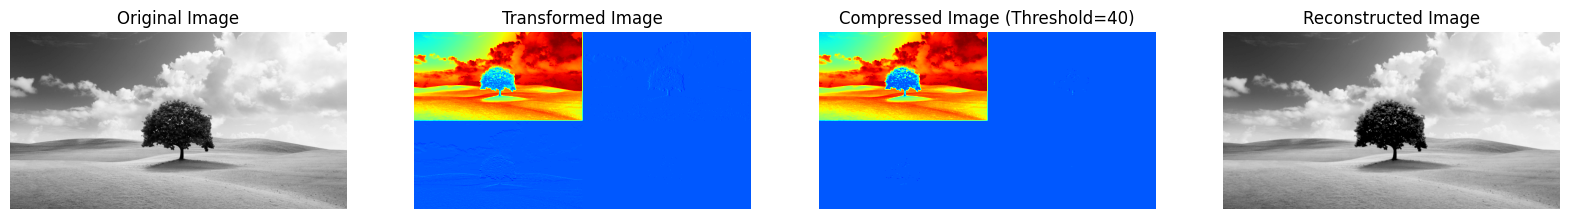

In [ ]:
# Display the original, transformed, compressed, and reconstructed images side by side
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(transformed_image, cmap='jet', vmin=np.min(transformed_image), vmax=np.max(transformed_image))
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(compressed_image, cmap='jet', vmin=np.min(transformed_image), vmax=np.max(transformed_image))
plt.title('Compressed Image (Threshold={})'.format(compression_threshold))
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

FFT & DWT

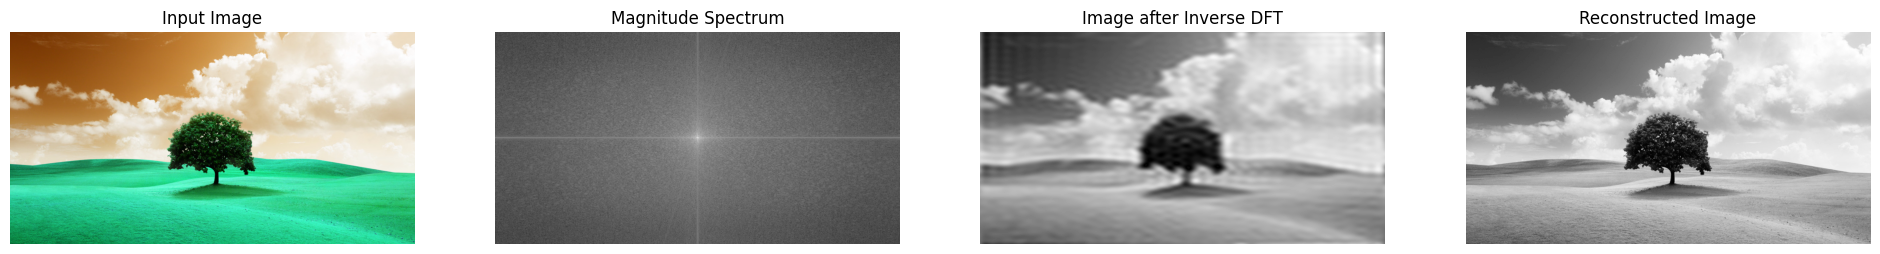

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert it to grayscale
image_path = '/content/free-nature-images.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# Calculate the magnitude of the Fourier Transform
magnitude = 20 * np.log(cv2.magnitude(fourier_shift[:,:,0], fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Calculate the discrete Fourier transform
DFT = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = gray.shape
center_row, center_col = row // 2, col // 2

# Create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1

# Apply the mask and inverse DFT
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
image_then = cv2.idft(fft_ifft_shift)

# Calculate the magnitude of the inverse DFT
image_then = cv2.magnitude(image_then[:,:,0], image_then[:,:,1])

# Define compression threshold
compression_threshold = 40  # Adjust this value to control the level of compression

# Apply compression by zeroing out Fourier coefficients below the threshold
compressed_fourier_shift = np.copy(fourier_shift)
compressed_fourier_shift[np.abs(compressed_fourier_shift) < compression_threshold] = 0

# Reconstruct the image from the compressed Fourier coefficients
compressed_image = np.fft.ifftshift(compressed_fourier_shift)
reconstructed_image = cv2.idft(compressed_image)

# Calculate the magnitude of the reconstructed image
reconstructed_magnitude = cv2.magnitude(reconstructed_image[:,:,0], reconstructed_image[:,:,1])

# Visualize the original image, the magnitude spectrum, the image after DFT, and the reconstructed image
plt.figure(figsize=(24, 6))

plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(143)
plt.imshow(image_then, cmap='gray')
plt.title('Image after Inverse DFT')
plt.axis('off')

plt.subplot(144)
plt.imshow(reconstructed_magnitude, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving MV_21BAI1217_LAB12.ipynb to MV_21BAI1217_LAB12.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>